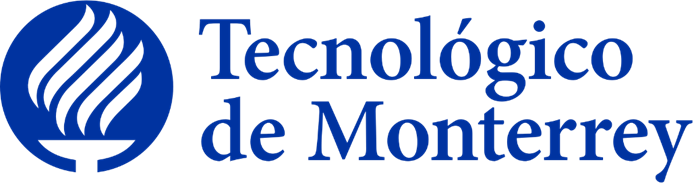

#Maestría en Inteligencia Artificial Aplicada.

#Ciencia y Analítica de Datos (TC4029.10) - Actividad Semanal - 7

#Kmeans

#Andrei García Torres (A01793891)

#Profesor: Dra. María de la Paz Rico


Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [3]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 28.2 MB/s 
     |████████████████████████████████| 1.0 MB 47.1 MB/s 
     |████████████████████████████████| 1.7 MB 55.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 61.9 MB/s 
     |████████████████████████████████| 6.3 MB 58.5 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=dacf765f839be6bb39a846cffce53df52363a74725f94ed2106c72f66a49ef7c
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=31a9f59e59ea533b8f5a3a354aaf6c55d70d6e48373dce805523ff3cad907683
  Stored in directory: /root/

In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [5]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [6]:
df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [8]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

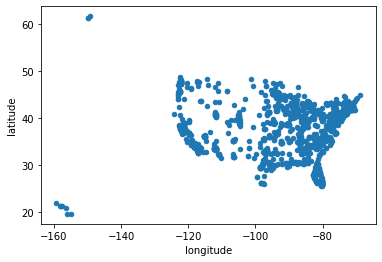

In [9]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [10]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [12]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [13]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [14]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [15]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

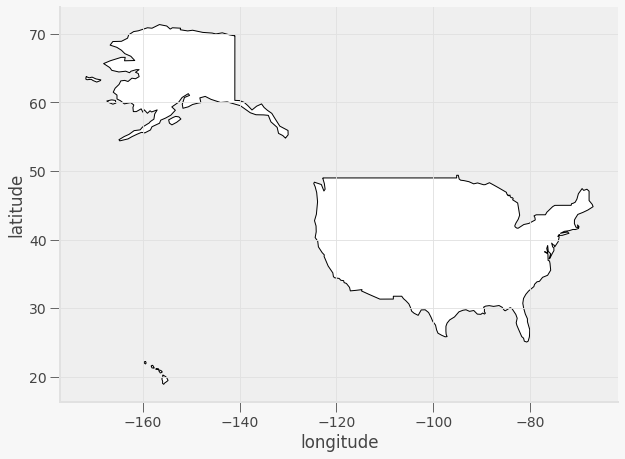

In [16]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

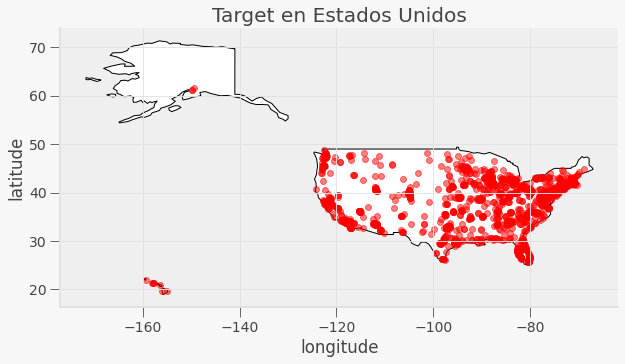

In [17]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [18]:
#tu codigo aquí

In [19]:
from sklearn.cluster import KMeans

In [20]:
X=np.array(df[["latitude","longitude"]])

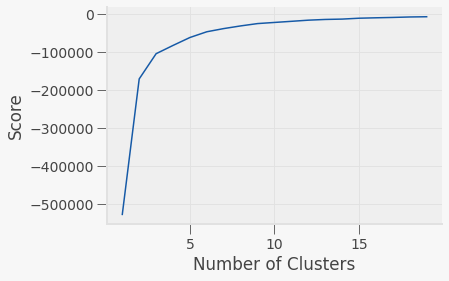

In [21]:
Nc = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
#plt.litle('Elbow Curve')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[  40.33790692  -75.6259688 ]
 [  37.57977424 -119.17634307]
 [  34.40676796  -98.24207528]
 [  41.77634657  -88.39926686]
 [  31.1065566   -82.90321172]]


In [23]:
new_targets = pd.DataFrame(centroids)
new_targets

,0,1
0,40.337907,-75.625969
1,37.579774,-119.176343
2,34.406768,-98.242075
3,41.776347,-88.399267
4,31.106557,-82.903212


In [24]:
headers = ['latitude','longitude']
print("headers\n", headers)

headers
 ['latitude', 'longitude']


In [25]:
new_targets.columns = headers
new_targets.head()

,latitude,longitude
0,40.337907,-75.625969
1,37.579774,-119.176343
2,34.406768,-98.242075
3,41.776347,-88.399267
4,31.106557,-82.903212


In [ ]:
new_targets

,latitude,longitude
0,37.579774,-119.176343
1,41.743380,-88.321149
2,34.420357,-98.266337
3,31.086863,-82.918371
4,40.339619,-75.558778


In [26]:
new_targets["Coordinates"] = list(zip(new_targets.longitude, new_targets.latitude))
new_targets["Coordinates"] = new_targets["Coordinates"].apply(Point)
new_targets.head()

,latitude,longitude,Coordinates
0,40.337907,-75.625969,POINT (-75.62596880456432 40.33790692406639)
1,37.579774,-119.176343,POINT (-119.17634307255436 37.57977423831522)
2,34.406768,-98.242075,POINT (-98.24207527946128 34.40676796464647)
3,41.776347,-88.399267,POINT (-88.39926685738095 41.77634657238095)
4,31.106557,-82.903212,POINT (-82.90321171948528 31.106556597058823)


In [27]:
gnew_targets = gpd.GeoDataFrame(new_targets, geometry="Coordinates")
gnew_targets.head()

,latitude,longitude,Coordinates
0,40.337907,-75.625969,POINT (-75.62597 40.33791)
1,37.579774,-119.176343,POINT (-119.17634 37.57977)
2,34.406768,-98.242075,POINT (-98.24208 34.40677)
3,41.776347,-88.399267,POINT (-88.39927 41.77635)
4,31.106557,-82.903212,POINT (-82.90321 31.10656)


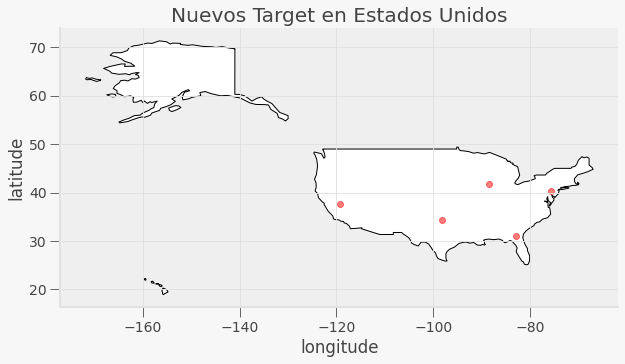

In [28]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gnew_targets.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Nuevos Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [29]:
from geopy.geocoders import Nominatim

In [30]:
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

In [31]:
# Latitude & Longitude input
Latitude = "37.57977424"
Longitude =  "-119.17634307"
 
location1 = geolocator.reverse(Latitude+","+Longitude)


In [32]:
Latitude = "41.74337966"
Longitude =  "-88.32114859"
 
location2 = geolocator.reverse(Latitude+","+Longitude)


In [33]:
Latitude = "34.42035677"
Longitude =  "-98.26633716"
 
location3 = geolocator.reverse(Latitude+","+Longitude)


In [34]:
Latitude = "31.08686259"
Longitude =  "-82.91837107"
 
location4 = geolocator.reverse(Latitude+","+Longitude)


In [35]:
Latitude = "40.3396189"
Longitude =  "-75.55877769"
 
location5 = geolocator.reverse(Latitude+","+Longitude)


In [36]:
print("Nuevo Target, Locación 1:",location1,"\n")

print("Nuevo Target, Locación 2:",location2,"\n")

print("Nuevo Target, Locación 3:",location3,"\n")

print("Nuevo Target, Locación 4:",location4,"\n")

print("Nuevo Target, Locación 5:",location5,"\n")

Nuevo Target, Locación 1: Iron Lake Trail, Madera County, California, United States 

Nuevo Target, Locación 2: 286, Evans Avenue, Aurora, Aurora Township, Kane County, Illinois, 60505, United States 

Nuevo Target, Locación 3: County Road E1790, Cotton County, Oklahoma, United States 

Nuevo Target, Locación 4: GA 168, Eightmile Still, Clinch County, Georgia, United States 

Nuevo Target, Locación 5: 417, Erb Road, Pleasant Run, New Hanover Township, Montgomery County, Pennsylvania, 18074, United States 



Encuentra el numero ideal de almacenes, justifica tu respuesta:
Encuentra las latitudes y longitudes de los almacenes, ¿que ciudad es?
Las localidades donde se pueden encuntrar los almacenes de manera ideal son las siguientes: 

Nuevo Target, Locación 1: Iron Lake Trail, Madera County, California, United States 

Nuevo Target, Locación 2: 286, Evans Avenue, Aurora, Aurora Township, Kane County, Illinois, 60505, United States 

Nuevo Target, Locación 3: County Road E1790, Cotton County, Oklahoma, United States 

Nuevo Target, Locación 4: GA 168, Eightmile Still, Clinch County, Georgia, United States 

Nuevo Target, Locación 5: 417, Erb Road, Pleasant Run, New Hanover Township, Montgomery County, Pennsylvania, 18074, United States

, ¿a cuantas tiendas va surtir?, De manera ideal cada almacen puede surtir a 367 tiendas. ¿sabes a que distancia estara? La distancia del almacen a cada tienda se puede calcular de acuerdo a la coordenadas geográficas. 
¿Cómo elegiste el numero de almacenes?, justifica tu respuesta tecnicamente? El numero de alamcenes se eligio a través de la función codo donde se aprecia que el numero 5 marca la disrupción de los clusters de manera significativa.

Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manerasimple, despues nos auxiliamos de una librería de datos geograficos.
¿qué librerías nos pueden ayudar a graficar este tipo de datos?
Las librerias utlizadas para graficar datos geograficos pueden ser 

import geopandas as gpd

import matplotlib.pyplot as plt

from shapely.geometry import Point

import qeds
qeds.themes.mpl_style();

¿Consideras importante que se grafique en un mapa?, ¿por qué?
La grafica del mapa con las tiendas y almaces ayuda mucho en la visualización de los datos. Se tiene un mayor entendimiento del analisis para ubicar las tiendas y los potenciales almacenes.

Agrega las conclusiones

El método de kmeans es my util para identificar y crear clusters de para el analisis de datos y un centroido que pueda correlacionar espacialmente a los datos. De tal modo simplificar un grupo de datos en pequenños subconjuntos relacionados.